In [1]:
# %pip install simpleaudio

# Imports

In [2]:
from skimage import io,color
import matplotlib.pyplot as plt
import numpy as np
import pickle
from itertools import product
import simpleaudio as sa

# Algoritmo de Huffman

In [3]:

# A class that will help to work with Huffman Tree
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # probability of symbol
        self.prob = prob

        # symbol 
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''

""" A helper function to print the codes of symbols by traveling Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
    return codes        


""" A helper function to calculate the probabilities of symbols in given data"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" A helper function to obtain the encoded output"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" A helper function to calculate the space difference between compressed and non compressed data"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit space to stor the data before compression
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #calculate how many bit is required for that symbol in total
    #print("Space usage before compression (in bits):", before_compression)    
    #print("Space usage after compression (in bits):",  after_compression)           

def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    #print("symbols: ", symbols)
    #print("probabilities: ", probabilities)
    
    nodes = []
    
    # converting symbols and probabilities into huffman tree nodes
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # sort all the nodes in ascending order based on their probability
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # combine the 2 smallest nodes to create new node
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
    
    huffman_encoding = Calculate_Codes(nodes[0])
    #print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0],huffman_encoding
    

def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string  

# Codificando la imagen usando la codificación de Huffman

### Importando Imagen y Convirtiendola a Blanco y Negro



.............CODIFICANDO............


Dimensiones de la imagen a color:
(225, 225, 3)


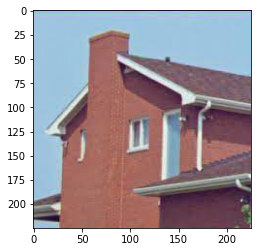

Dimensiones de la imagen a blanco y negro:
(225, 225)


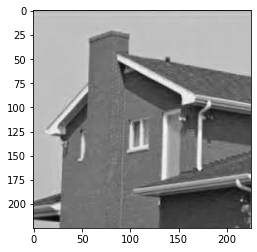

imagen a blanco y negro Final:


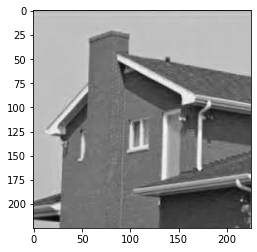

In [4]:
print ("\n\n.............CODIFICANDO............\n\n")

# print("Encoded output", encodeText)
# print("Decoded Output", Huffman_Decoding(encodeText,tree1))

image=io.imread("img_house.jpeg")

print("Dimensiones de la imagen a color:")
print(image.shape)
plt.imshow(image)
plt.show()
gray_image=color.rgb2gray(image)

print("Dimensiones de la imagen a blanco y negro:")
print(gray_image.shape)
plt.imshow(gray_image,cmap='gray')
plt.show()

print("imagen a blanco y negro Final:")
# Dejamos el arreglo de imagenes entre 0 y 255
gray_image=gray_image*255
plt.imshow(gray_image,cmap='gray')
plt.show()

### Reduciendo Dimensionalidad

In [5]:
# img=gray_image

# #Reduccion de la dimensionalidad de la imagen
# min=img.min()
# max=img.max()
# diferencia=7

# img_adj=np.zeros(np.shape(img),dtype=int)

# for i in range(len(img_adj)):
#     for j in range(len(img_adj[i])):
#         img_adj[i,j]= int((diferencia)*(img[i,j]- min)/(max-min))
# #Reescalando
# img_final=np.zeros(np.shape(img_adj),dtype=int) 
# for i in range(len(img_adj)):
#     for j in range(len(img_adj[i])):
#         img_final[i,j]=int(img_adj[i,j]*(max-min)/diferencia + min)

# plt.imshow(img_final,cmap='gray')

# plt.show()
# plt.imshow(img,cmap='gray')

### Fsk

In [6]:
# frq #Frecuencia de inicio
# frecdev #Separación entre cada elemento en frecuencia
def fsk(imagen,frq=200,frecdev=10,bits=8):
    encoding, tree,dic=Huffman_Encoding(imagen)
    
    lista = list(product(["0","1"], repeat=bits))
    lista =["".join(x)  for x in  lista]
    dic_freq={}
    for llave in lista:
        dic_freq[llave]=frq
        frq+=frecdev
    dic_freq["0"]=frq
    dic_freq["1"]=frq+frecdev
    pos=0
    lista_freq=[]
    while len(encoding)>pos:
        for llave in dic_freq.keys():
            largo=len(llave)
            if encoding[pos:largo+pos]==llave:
                lista_freq.append(dic_freq[llave])
                pos+=largo
                break
    return lista_freq,encoding,tree,dic,dic_freq

### Flattening the image and saving the data

In [7]:
#La matriz se transforma a dimensionalidad 1
img_final=gray_image.flatten()
img_final=[ str(e)+" " for e in img_final]

codes={}
lista_freq,encoding, tree,dic,dic_freq=fsk(img_final,frq=350,frecdev=40)

# Using Pickle we save:
# Frequency Dictionary, where the key is the frecuency returned by the Hoffman algorithm
#  and the value is the real Frequency
with open("dic_freq.pickle", "wb") as f:
    pickle.dump(dic_freq, f)

# frequency tree created by the Huffman Algorithm
with open("tree.pickle", "wb") as f:
    pickle.dump(tree, f)



In [8]:
print(np.array(lista_freq).max())

10630


# Generación del audio

In [9]:
fs = 44100  # 44100 samples per second
seconds = 0.03
t = np.linspace(0, seconds, int(seconds * fs),False,dtype=float)

note = []

for x in lista_freq:
    note.append(0.5*np.sin(x * t * 2 * np.pi))
print(np.shape(note))

header=[]
for x in [12000,12000,12000,13000,13000,13000,12000,12000,12000,13000,13000,13000]:
    header.append(0.5*np.sin(x * t * 2 * np.pi))


(75128, 1323)


In [13]:
sampling=np.shape(note)[1]
sonido_completo=np.concatenate((header,note))

audio=sonido_completo
print(np.shape(audio))
print(audio[0][1])

# # Ensure that highest value is in 16-bit range
# audio = sonido_completo * (2**15 - 1) / np.max(np.abs(sonido_completo))
# # Convert to 16-bit data
# audio = audio.astype(np.int16)
# Start playback

# play_obj = sa.play_buffer(audio, 1, 2, fs)
# # Wait for playback to finish before exiting
# play_obj.wait_done()



(75140, 1323)
0.495183480747419
